# **SQL With Pyspark**



In [2]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.3 MB 45 kB/s 
     |████████████████████████████████| 199 kB 56.7 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.0-py2.py3-none-any.whl size=281764026 sha256=ecb4598419d27302f508d86122c134cffd16407720809adb37fbec78fc2e2381
  Stored in directory: /root/.cache/pip/wheels/7a/8e/1b/f73a52650d2e5f337708d9f6a1750d451a7349a867f928b885
Successfully built pyspark


In [3]:
import pyspark

In [4]:
from pyspark.sql import SparkSession
spark=SparkSession.builder.appName('pandas').getOrCreate()

In [5]:
spark

Spark to Pandas DataFrame

In [6]:
df_spark=spark.read.csv('/content/drive/MyDrive/Pyspark/test3.csv',header=True,inferSchema=True)

In [7]:
df_spark.show()

+---------+------------+------+
|     Name| Departments|salary|
+---------+------------+------+
|    Krish|Data Science| 10000|
|    Krish|         IOT|  5000|
|   Mahesh|    Big Data|  4000|
|    Krish|    Big Data|  4000|
|   Mahesh|Data Science|  3000|
|Sudhanshu|Data Science| 20000|
|Sudhanshu|         IOT| 10000|
|Sudhanshu|    Big Data|  5000|
|    Sunny|Data Science| 10000|
|    Sunny|    Big Data|  2000|
+---------+------------+------+



In [8]:
df_pandas=df_spark.toPandas()

In [9]:
type(df_pandas)

pandas.core.frame.DataFrame

In [10]:
df_pandas

,Name,Departments,salary
0,Krish,Data Science,10000
1,Krish,IOT,5000
2,Mahesh,Big Data,4000
3,Krish,Big Data,4000
4,Mahesh,Data Science,3000
5,Sudhanshu,Data Science,20000
6,Sudhanshu,IOT,10000
7,Sudhanshu,Big Data,5000
8,Sunny,Data Science,10000
9,Sunny,Big Data,2000


In [11]:
df_pandas.head(3)

,Name,Departments,salary
0,Krish,Data Science,10000
1,Krish,IOT,5000
2,Mahesh,Big Data,4000


In [12]:
df_pandas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         10 non-null     object
 1   Departments  10 non-null     object
 2   salary       10 non-null     int32 
dtypes: int32(1), object(2)
memory usage: 328.0+ bytes


In [13]:
df_pandas.nunique()

Name           4
Departments    3
salary         6
dtype: int64

Pandas to Spark dataFrame

In [14]:
df_pyspark=spark.createDataFrame(df_pandas)

In [15]:
type(df_pyspark)

pyspark.sql.dataframe.DataFrame

# **SQL with Pyspark**

In [16]:
# import data set

In [17]:
#!pip install --upgrade pandas

In [18]:
df_sales=spark.read.csv('/content/drive/MyDrive/Pyspark/Sample_Sales Records_xls.csv',header=True,inferSchema=True)

In [19]:
type(df_sales)

pyspark.sql.dataframe.DataFrame

In [20]:
#Converting spark DataFrame to Temptables
df_sales.registerTempTable('superstore') #table name is 'superstore

/usr/local/lib/python3.7/dist-packages/pyspark/sql/dataframe.py:229: FutureWarning: Deprecated in 2.0, use createOrReplaceTempView instead.
  warnings.warn("Deprecated in 2.0, use createOrReplaceTempView instead.", FutureWarning)


In [21]:
type(df_sales)

pyspark.sql.dataframe.DataFrame

In [22]:
df_sales.columns

['Region',
 'Country',
 'Item Type',
 'Sales Channel',
 'Order Priority',
 'Order Date',
 'Order ID',
 'Ship Date',
 'Units Sold',
 'Unit Price',
 'Unit Cost',
 'Total Revenue',
 'Total Cost',
 'Total Profit']

In [23]:
#import pandas as pd
#df=df_sales.toPandas()
#df_p=pd.read_csv(r'/content/drive/MyDrive/Pyspark/Sample_Sales Records_xls.csv')

In [24]:
df_sales.show()

+--------------------+--------------------+---------------+-------------+--------------+----------+---------+----------+----------+----------+---------+-------------+----------+------------+
|              Region|             Country|      Item Type|Sales Channel|Order Priority|Order Date| Order ID| Ship Date|Units Sold|Unit Price|Unit Cost|Total Revenue|Total Cost|Total Profit|
+--------------------+--------------------+---------------+-------------+--------------+----------+---------+----------+----------+----------+---------+-------------+----------+------------+
|Australia and Oce...|              Tuvalu|      Baby Food|      Offline|             H| 5/28/2010|669165933| 6/27/2010|      9925|    255.28|   159.42|    2533654.0| 1582243.5|    951410.5|
|Central America a...|             Grenada|         Cereal|       Online|             C| 8/22/2012|963881480| 9/15/2012|      2804|     205.7|   117.11|     576782.8| 328376.44|   248406.36|
|              Europe|              Russia|Of

In [25]:
spark.sql('select Region from superstore ').distinct().show(truncate=0)

+---------------------------------+
|Region                           |
+---------------------------------+
|Middle East and North Africa     |
|Australia and Oceania            |
|Europe                           |
|Sub-Saharan Africa               |
|Central America and the Caribbean|
|North America                    |
|Asia                             |
+---------------------------------+



In [26]:
spark.sql("""select `Total Revenue` from superstore""").show(truncate=0)

+-------------+
|Total Revenue|
+-------------+
|2533654.0    |
|576782.8     |
|1158502.59   |
|75591.66     |
|3296425.02   |
|759202.72    |
|2798046.49   |
|1245112.92   |
|496101.1     |
|1356180.1    |
|19103.44     |
|455479.04    |
|902980.64    |
|5997054.98   |
|400558.73    |
|182825.44    |
|3039414.4    |
|257653.5     |
|2559474.1    |
|2492526.12   |
+-------------+
only showing top 20 rows



## 1.**List all distinct** **ItemType** 

In [27]:
spark.sql('select `Item Type` as UniqueItems from superstore ').distinct().show(truncate=0)

+---------------+
|UniqueItems    |
+---------------+
|Baby Food      |
|Cereal         |
|Meat           |
|Household      |
|Vegetables     |
|Beverages      |
|Office Supplies|
|Cosmetics      |
|Personal Care  |
|Fruits         |
|Snacks         |
|Clothes        |
+---------------+



### 2. **Channel wise Revenue**

In [28]:
spark.sql('select `Sales Channel`,sum(`Total Revenue`) as channel_wise_revenue from superstore group by `Sales channel`').show()

+-------------+--------------------+
|Sales Channel|channel_wise_revenue|
+-------------+--------------------+
|       Online| 5.825395911000001E7|
|      Offline| 7.909480919999997E7|
+-------------+--------------------+



### 3. **Country wise Total Profit**
### Top 10

In [29]:
spark.sql('select Country,sum(`Total Profit`) as Country_wise_Profit from superstore group by Country order by Country_wise_Profit desc limit 10 ').show()

+-----------+-------------------+
|    Country|Country_wise_Profit|
+-----------+-------------------+
|   Djibouti|         2425317.87|
|    Myanmar|          1802771.7|
|   Pakistan|         1719922.04|
|     Samoa |         1678540.98|
|   Honduras|         1609947.52|
|    Iceland|         1541705.29|
| Azerbaijan|         1512926.83|
|Switzerland|         1512729.45|
|     Mexico|         1457942.76|
|     Rwanda|         1417493.49|
+-----------+-------------------+



### 4.**Region wise unit solds**

In [30]:
spark.sql('select Region,sum(`Units Sold`) as Region_wise_unitsolds from superstore group by Region order by Region_wise_unitsolds desc' ).show()

+--------------------+---------------------+
|              Region|Region_wise_unitsolds|
+--------------------+---------------------+
|  Sub-Saharan Africa|               182870|
|              Europe|                98117|
|Australia and Oce...|                68325|
|                Asia|                59967|
|Middle East and N...|                48678|
|Central America a...|                35771|
|       North America|                19143|
+--------------------+---------------------+



### 5.**Region wise average profit**

In [31]:
spark.sql('select Region,avg(`Total Profit`) as average_profit_region from superstore group by Region order by average_profit_region desc').show()

+--------------------+---------------------+
|              Region|average_profit_region|
+--------------------+---------------------+
|Middle East and N...|           576119.186|
|                Asia|            555804.17|
|              Europe|    503769.9377272727|
|       North America|            485980.92|
|Australia and Oce...|   429287.27545454545|
|Central America a...|   406701.12142857147|
|  Sub-Saharan Africa|     338422.538888889|
+--------------------+---------------------+



### 6.**Number of Countries on Each Priority**

In [41]:
spark.sql('select `Order Priority`,count(Country) as `Total Countries` from superstore group by `Order Priority`').show()

+--------------+---------------+
|Order Priority|Total Countries|
+--------------+---------------+
|             L|             27|
|             M|             21|
|             C|             22|
|             H|             30|
+--------------+---------------+



In [42]:
df_sales.columns


['Region',
 'Country',
 'Item Type',
 'Sales Channel',
 'Order Priority',
 'Order Date',
 'Order ID',
 'Ship Date',
 'Units Sold',
 'Unit Price',
 'Unit Cost',
 'Total Revenue',
 'Total Cost',
 'Total Profit']

### 7.**Item Type wise Total Cost**

In [46]:
spark.sql('select `Item Type`, sum(`Total Cost`)as `Total Cost spend on each item` from superstore group by `Item Type`order by `Total Cost spend on each item` desc ').show()

+---------------+-----------------------------+
|      Item Type|Total Cost spend on each item|
+---------------+-----------------------------+
|Office Supplies|         2.4655796319999997E7|
|      Household|                2.247710658E7|
|      Cosmetics|                2.204546094E7|
|      Baby Food|                    6463683.9|
|           Meat|                   3893065.75|
|         Cereal|                   3030455.47|
|  Personal Care|                   2760282.36|
|        Clothes|                    2553958.4|
|     Vegetables|           1823237.4300000002|
|      Beverages|           1802747.3199999998|
|         Snacks|                   1328789.28|
|         Fruits|                    345986.16|
+---------------+-----------------------------+



### 8.**Trends on Sum of Profit_Revenue_Cost**

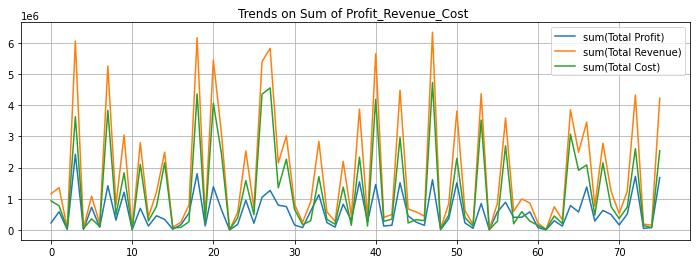

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
(spark.sql('select sum(`Total Profit`),sum(`Total Revenue`),sum(`Total Cost`) from superstore group by Country')).toPandas().plot(figsize=(12,4),grid=True,title='Trends on Sum of Profit_Revenue_Cost ')

### 9.**Yearly Profit**

In [66]:
sql_time=spark.sql('select `Order Date`,`Units Sold`,`Total Revenue`,`Total Profit`,`Item Type` from superstore ').toPandas().set_index('Order Date')

In [67]:
sql_time

,Units Sold,Total Revenue,Total Profit,Item Type
Order Date,,,,
5/28/2010,9925,2533654.00,951410.50,Baby Food
8/22/2012,2804,576782.80,248406.36,Cereal
5/2/2014,1779,1158502.59,224598.75,Office Supplies
6/20/2014,8102,75591.66,19525.82,Fruits
2/1/2013,5062,3296425.02,639077.50,Office Supplies
...,...,...,...,...
7/26/2011,888,97040.64,65214.72,Clothes
11/11/2011,6267,58471.11,15103.47,Fruits
6/1/2016,1485,228779.10,93748.05,Vegetables


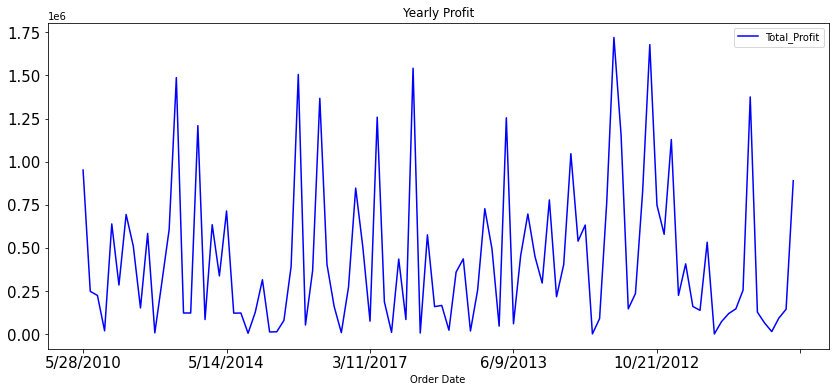

In [82]:
sql_time['Total Profit'].plot(color='blue',figsize=(14,6),label='Total_Profit',legend=True,title='Yearly Profit',fontsize=15)

### 10. **Item wise profit vizualization**

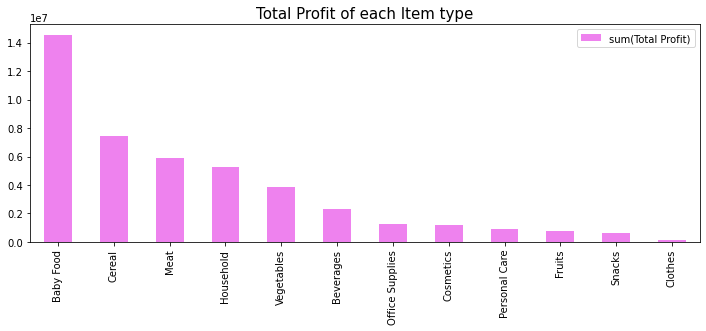

In [148]:
import numpy as np
x=[0,1,2,3,4,5,6,7,8,9,10,11]
v=['Baby Food','Cereal','Meat','Household','Vegetables','Beverages','Office Supplies','Cosmetics','Personal Care','Fruits','Snacks','Clothes']
spark.sql('select `Item Type`,sum(`Total Profit`) from superstore group by `Item Type` order by sum(`Total Profit`) desc ').toPandas().plot(kind='bar',figsize=(12,4),color='violet')
plt.title('Total Profit of each Item type',fontsize=15)
plt.xticks(x,v)
plt.show()

### 11.**Region wise Total Revenue**

Text(0.5, 1.0, 'Region wise Revenue')

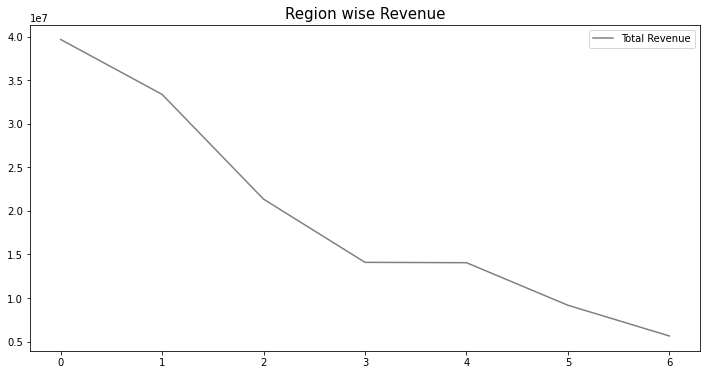

In [162]:
spark.sql('select Region,sum(`Total Revenue`) as `Total Revenue` from superstore group by Region order by `Total Revenue` desc ').toPandas().plot(kind='line',figsize=(12,6),color='gray')
plt.title('Region wise Revenue',fontsize=15)